# Методы оптимизации.
## Реализация метода золотого сечения 
И градиентного спуска на его основе

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

In [6]:
# Обобщенная функция для вычисления градиента.
def grad(f): 
    def grad_help(*args):
        h = 1e-5
        dim = len(args)
        return [(f(*[args[j] + (h if j == i else 0) for j in range(dim)]) -
                f(*[args[j] - (h if j == i else 0) for j in range(dim)]))/(2*h)
                for i in range(dim)]
    return grad_help

In [7]:
# example
def f(x, y): 
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3)*np.cos(2*x+1-np.exp(y))

In [8]:
# Градиентный спуск
# Число вычислений grad f  = epoch - 1
# Число вычислений f = 0
def gradient_descent(f, lr0, d, epoch, x):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad(f)(*x))
        points[i] = x  
    return points

# Градиентный спуск с постоянным шагом.
def gradient_descent_const(f, lr, epoch, x):
    return gradient_descent(f, lr, 0, epoch, x)

In [9]:
# Метод золотого сечения
# a,b -- границы промежутка, внутри которого осуществляется поиск
# eps -- точность
points_check = []
def golden(f, a, b, eps, counters = [0,0]):
    phi = (1 + np.sqrt(5))/2
    def min_rec(f, eps, a, b, fx1, fx2):
        if b-a < eps:
            return (a+b)/2
        else:
            t = (b-a)/phi
            x1, x2 = b - t, a + t

            if fx1 == None:
                fx1 = f(x1)
                points_check.append(x1)
                counters[0] += 1
            if fx2 == None:
                fx2 = f(x2)
                points_check.append(x2)
                counters[0] += 1
            
            if fx1 >= fx2:
                return min_rec(f, eps, x1, b, fx2, None)
            else:
                return min_rec(f, eps, a, x2, None, fx1)
    return min_rec(f, eps, min(a,b), max(a,b), None, None)                 

-3.5342231046900734
[21, 0]


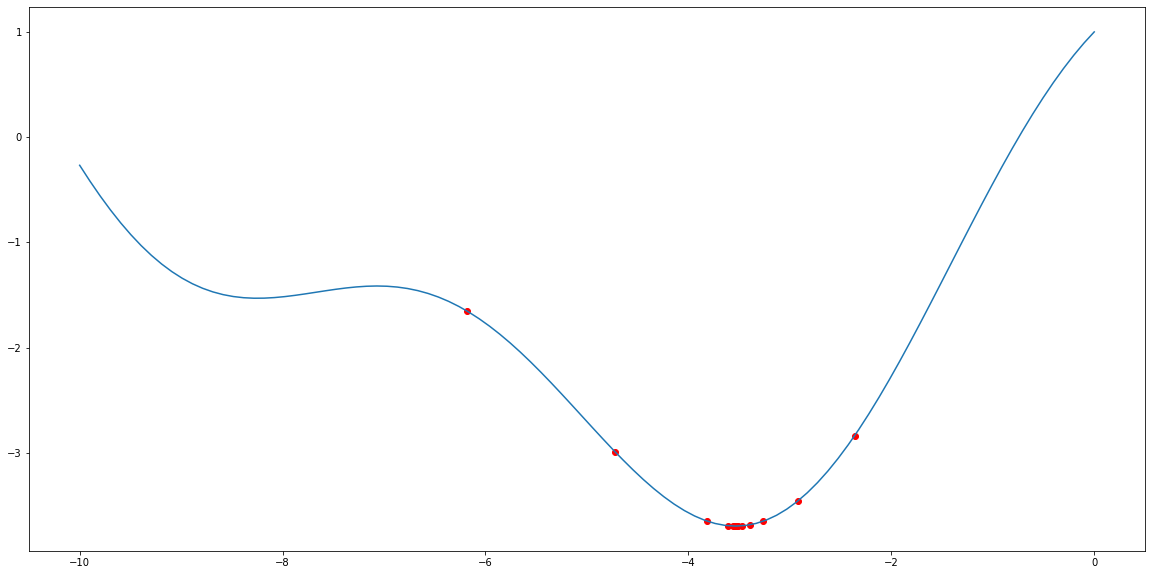

In [10]:
def g(x): 
    return np.cos(x)+3*np.sin(x/3)

x = np.linspace(-10, 0, 100)
y = g(x)

fig, ax = plt.subplots()
ax.plot(x, y)

counters = [0,0]
print(golden(g, -10, 0, 0.001, counters))
print(counters)
plt.scatter(points_check,g(np.array(points_check)), color="red")

plt.plot()
plt.show()

In [27]:
# Градиентный спуск на основе метода золотого сечения
# Число вычислений f -- epoch - 1.
def gradient_golden_sec(f, lr, epoch, x, eps, counters = [0,0]):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        d = np.array(grad(f)(*x))
        f_line = lambda a: f((x - a*d)[0], (x - a*d)[1])
        x = x - golden(f_line, 0, lr, eps, counters) * d
        points[i] = x
    counters[1] = epoch - 1 
    return points

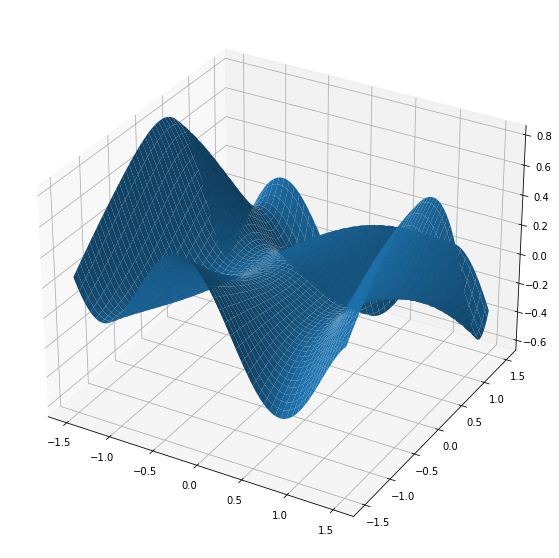

In [24]:
t = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

In [33]:
lr = 1
epoch = 15
x = [-0.1, -0.4]

counters = [0,0]
points = gradient_golden_sec(f, lr, epoch, x, 0.1, counters)

points

array([[-0.1       , -0.4       ],
       [-0.14982977, -0.22810753],
       [-0.31686347, -0.11042827],
       [-0.66780836, -0.02441204],
       [-0.68096823, -0.09453062],
       [-0.71135268, -0.15427624],
       [-0.7126012 , -0.21578724],
       [-0.75721754, -0.25455267],
       [-0.73721477, -0.28596179],
       [-0.77337138, -0.31132677],
       [-0.75690494, -0.33490548],
       [-0.78473003, -0.35466967],
       [-0.77162148, -0.3731005 ],
       [-0.79153415, -0.38591566],
       [-0.78235694, -0.40085534]])

In [34]:
counters

[84, 14]

-0.040909753039239875


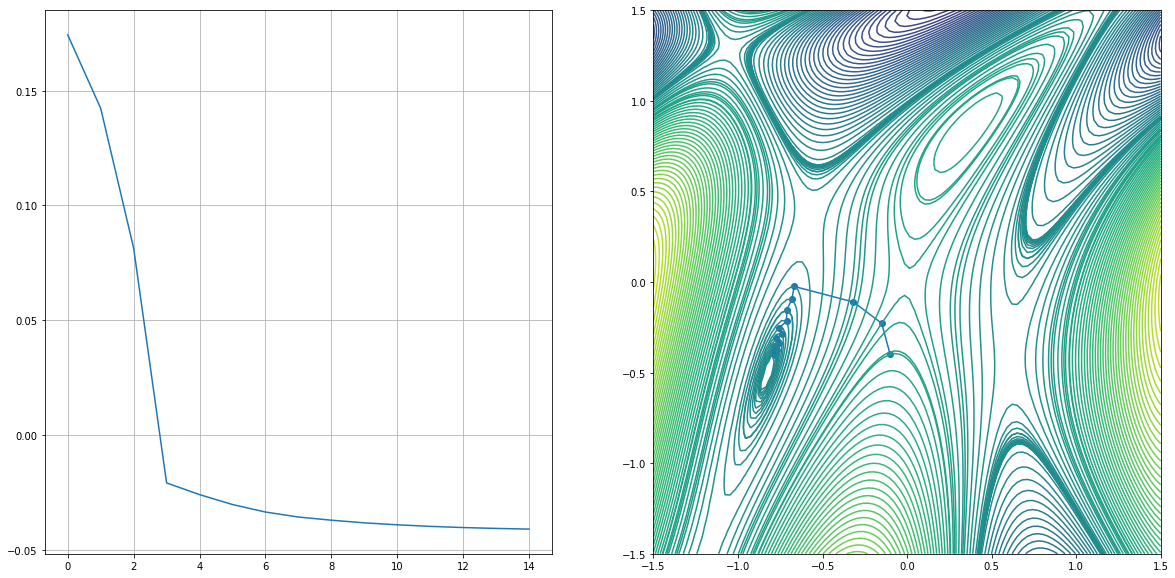

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f(points[:, 0], points[:, 1]))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))
print(f(points[-1, 0], points[-1, 1]))

44
-0.04055014991941573


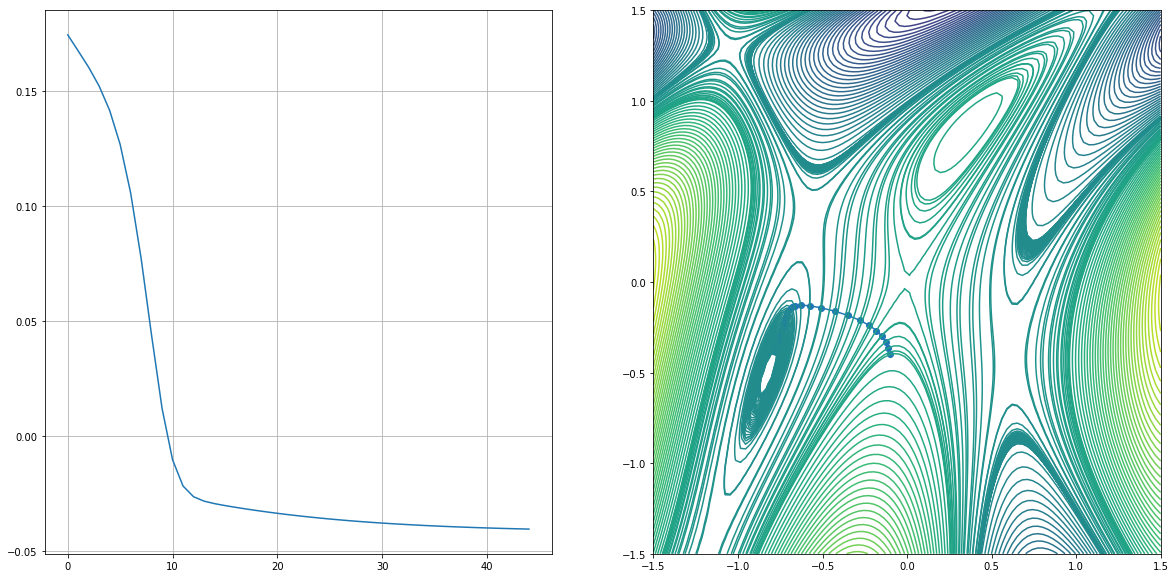

In [36]:
def gradient_descent(f, lr0, d, epoch, x):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad(f)(*x))
        points[i] = x  
    return points

def gradient_descent_const(f, lr, epoch, x):
    return gradient_descent(f, lr, 0, epoch, x)



In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f(points[:, 0], points[:, 1]))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))
print(f(points[-1, 0], points[-1, 1]))